Regresión logística:

Predicción de diagnóstico de cáncer de mama.
El dataset contiene características médicas derivadas de imágenes de células mamarias (como textura, radio, concavidad, etc.), se puede predecir si un tumor es maligno o benigno.

¿Por qué usar regresión logística?
Porque el objetivo es predecir una variable categórica binaria (maligno = 1, benigno = 0).

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [7]:

df = pd.read_csv('data.csv')
df.head()
df.info()

#borrar columnas innecesarias
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# pasar variable categorica a numerica
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

#verificar valores nulos
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:

# seleccionar variables independientes y dependientes
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# entrenar del modelo
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9736842105263158
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



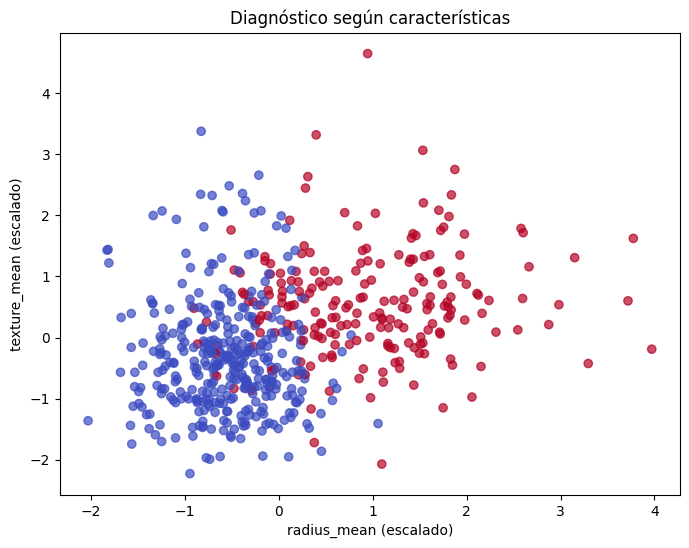

In [14]:
#visualizacion del modelo
X_vis = df[['radius_mean', 'texture_mean']]
y_vis = df['diagnosis']


X_vis_scaled = scaler.fit_transform(X_vis)

# entrenamos un nuevo modelo para graficar
model_vis = LogisticRegression()
model_vis.fit(X_vis_scaled, y_vis)

# Graficamos los datos y la predicción
plt.figure(figsize=(8,6))
plt.scatter(X_vis_scaled[:,0], X_vis_scaled[:,1], c=y_vis, cmap='coolwarm', alpha=0.7)
plt.xlabel('radius_mean (escalado)')
plt.ylabel('texture_mean (escalado)')
plt.title('Diagnóstico según características')
plt.show()
